In [20]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from tueplots import bundles
import matplotlib.pyplot as plt
import re
import os

In [2]:
plt.rcParams.update(bundles.neurips2021())

In [3]:
dat_src = r'../dat/bundesnetzagentur/pre_processed_data/prod_price_de_lu_2019_2021.csv'
fig_src = r'../doc/fig/'

In [4]:
combined = pd.read_csv(dat_src,
                       parse_dates=['time'])
combined = combined.set_index('time')
combined = combined.dropna()

In [9]:
def to_tex(text):
    """
    Helper function to prepare string for latex.
    """
    conv = {
        '&': r'\&',
        '%': r'\%',
        '$': r'\$',
        '#': r'\#',
        '_': r'\_',
        '{': r'\{',
        '}': r'\}',
        '~': r'\textasciitilde{}',
        '^': r'\^{}',
        '\\': r'\textbackslash{}',
        '<': r'\textless{}',
        '>': r'\textgreater{}',
    }
    regex = re.compile('|'.join(re.escape(str(key)) for key in sorted(conv.keys(), key = lambda item: - len(item))))
    return regex.sub(lambda match: conv[match.group()], text)

# Regression

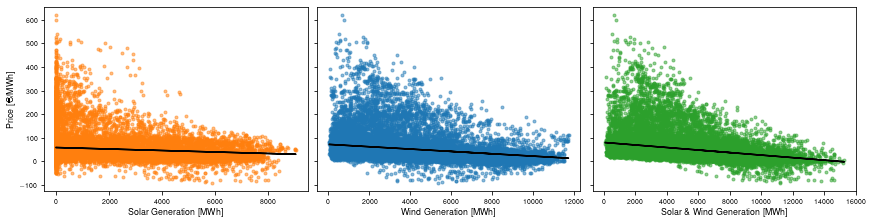

In [21]:
cols = [('Solar', 'tab:orange'), ('Wind', 'tab:blue'), ('Solar & Wind', 'tab:green')]

fig, axs = plt.subplots(1, 3, figsize=(12,3), sharey=True) # figsize=(16,4), 

axs[0].set_ylabel('Price [€/MWh]')

for i in range(0, len(axs)):
    col, color = cols[i]
    ax  = axs[i]
    
    X = combined[col].to_numpy().reshape(-1,1)
    y = combined['Price'].to_numpy()

    reg = LinearRegression()
    reg.fit(X, y)

    m = reg.coef_
    b = reg.intercept_
    
    ax.plot(X, y, 'o', color=color, ms=3, alpha=0.5)
    ax.plot(X, m*X + b, 'black')

    ax.set_xlabel(f'{to_tex(col)} Generation [MWh]')

plt.savefig(os.path.join(fig_src, 'solar_wind_regression.pdf'))